## Install Libraries


In [52]:

!pip install geocoder
!pip install geopy
!pip install folium
print("Libraries Installed!")


Libraries Installed!


## Import Libraries

In [53]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import geocoder
import folium
import requests 
import json 
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("Libraries Imported!")

Libraries Imported!


## Extracting and Cleaning Data

In [54]:
#Extract data from Wikipedia page
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r=requests.get(url)
soup=BeautifulSoup(r.content,'html5lib')

In [55]:
#Define dataframe columns
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)
toronto



,Postalcode,Borough,Neighborhood


In [56]:
#Convert extracted data into a dataframe
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [57]:
#Get geographical coordinates 
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M5G')

[43.65609000000006, -79.38492999999994]

In [58]:
#Assign latitude and longtitude to each neighborhood
postal_codes = df['PostalCode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']


In [59]:
#View first 15 rows to see corresponding geographical coordinates
df.head(15)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188
5,M9A,Etobicoke,Islington Avenue,43.66263,-79.52831
6,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
7,M3B,North York,Don Mills North,43.74923,-79.36186
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804




## Map of Toronto

In [60]:
#Get geographical coordinates of Toronto
address = 'Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto Canada are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Toronto Canada are 43.6534817, -79.3839347.


In [61]:
#Create map of Toronto 
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7,parse_html=False).add_to(map_toronto)  
map_toronto

In [62]:
CLIENT_ID = 'QDDIWPKDG4P4EQ5TYFO5N05YLCRNMSKCZ3FFWO4Q1AOGHPAH' # Put Your Client Id
CLIENT_SECRET = '122OOOJS5KO4YZWBXF4SWXVSMBDTRCBUISSC4FVZBPZZ5E5B' # Put You Client Secret 
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QDDIWPKDG4P4EQ5TYFO5N05YLCRNMSKCZ3FFWO4Q1AOGHPAH
CLIENT_SECRET: 122OOOJS5KO4YZWBXF4SWXVSMBDTRCBUISSC4FVZBPZZ5E5B


In [63]:
#Get information on nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'],longitudes=df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

In [64]:
#Check size of the new dataframe
print(toronto_venues.shape)
toronto_venues.head()

(2376, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.75245,-79.32991,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.75245,-79.32991,Brookbanks Pool,43.751389,-79.332184,Pool
2,Parkwoods,43.75245,-79.32991,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Parkwoods,43.75245,-79.32991,649 Variety,43.754513,-79.331942,Convenience Store
4,Victoria Village,43.73057,-79.31306,Wigmore Park,43.731023,-79.310771,Park


In [65]:
toronto_venues_only_restaurant = toronto_venues[toronto_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
toronto_venues_only_restaurant.index = np.arange(1, len(toronto_venues_only_restaurant )+1)

print (toronto_venues_only_restaurant['Venue Category'].value_counts())

Restaurant                         64
Italian Restaurant                 51
Japanese Restaurant                47
Sushi Restaurant                   39
Fast Food Restaurant               32
Seafood Restaurant                 29
Thai Restaurant                    27
American Restaurant                27
Asian Restaurant                   22
Middle Eastern Restaurant          20
Vegetarian / Vegan Restaurant      19
Greek Restaurant                   15
French Restaurant                  13
Indian Restaurant                  12
Chinese Restaurant                 12
Ramen Restaurant                   11
Vietnamese Restaurant              11
Mediterranean Restaurant           11
Mexican Restaurant                 10
New American Restaurant             8
Falafel Restaurant                  7
Korean Restaurant                   6
Comfort Food Restaurant             5
Latin American Restaurant           5
Caribbean Restaurant                5
Brazilian Restaurant                5
Eastern Euro

In [66]:
#Find out how many unique categories can be curated from all the returned values

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 263 uniques categories.


In [67]:
#Analysing each neighborhood

toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()


,Neighborhood,Yoga Studio,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Newsagent,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.

In [68]:
#Show the top 5 most common venues in each neihborhood

num_top_venues = 5
for neigh in toronto_grouped['Neighborhood']:
    print("----"+neigh+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.13
1  Hong Kong Restaurant  0.07
2         Grocery Store  0.07
3          Skating Rink  0.07
4         Shopping Mall  0.07


----Alderwood, Long Branch----
                   venue  freq
0      Convenience Store  0.25
1  Performing Arts Venue  0.25
2                    Gym  0.25
3                    Pub  0.25
4            Yoga Studio  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                     venue  freq
0              Men's Store   0.5
1         Business Service   0.5
2  New American Restaurant   0.0
3            Metro Station   0.0
4       Mexican Restaurant   0.0


----Bayview Village----
                        venue  freq
0                       Trail   0.4
1  Construction & Landscaping   0.2
2                        Park   0.2
3                     Dog Run   0.2
4   Middle Eastern Restaurant   0.0


----Bedford Park, Lawrence Manor East----
                  venue  freq
0          

In [69]:
#Sort the top 5 most common venues into in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]


In [70]:
#Display top 10 venues for each neighborhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Badminton Court,Newsagent,Shopping Mall,Bubble Tea Shop,Supermarket,Sushi Restaurant,Bakery,Discount Store,Department Store
1,"Alderwood, Long Branch",Pub,Performing Arts Venue,Gym,Convenience Store,Women's Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Men's Store,Business Service,Women's Store,Doctor's Office,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room
3,Bayview Village,Trail,Dog Run,Construction & Landscaping,Park,Women's Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Indian Restaurant,Pharmacy,Pub,Café,Restaurant,Butcher


## Find optimal k-Means

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [72]:
max_range = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = toronto_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

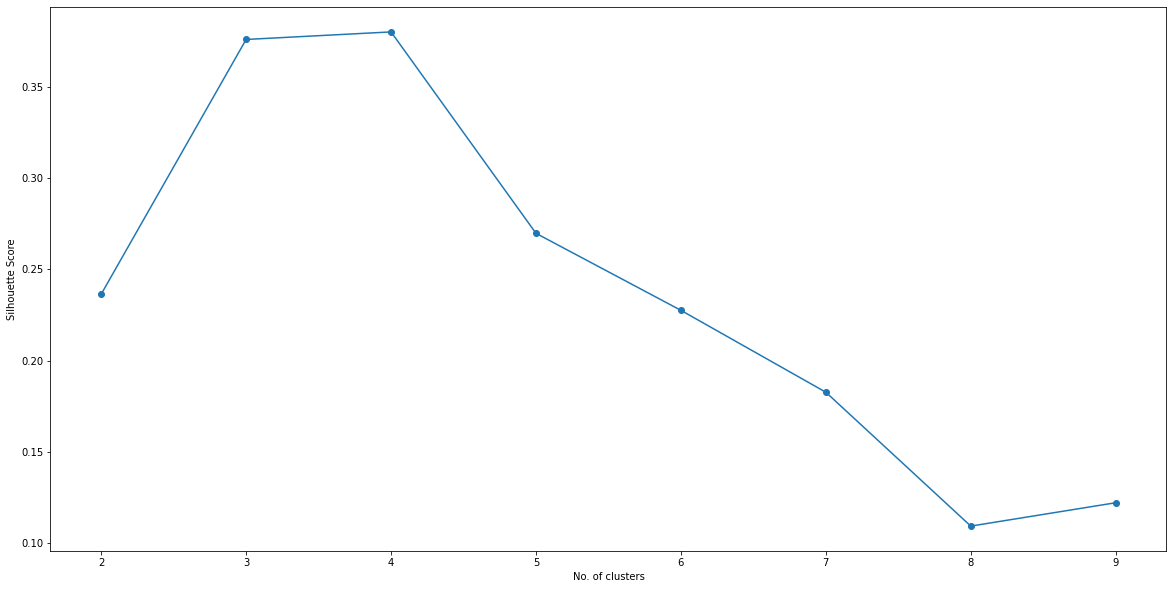

In [73]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [74]:
#Clustering Neighborhoods based on the optimal k of 4

kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[1 1 1 0 1 1 1 1 1 1]
101


In [75]:
#Create new dataframe that includes the cluster and the top 10 venues for each neighborhood

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = df
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75245,-79.32991,0.0,Food & Drink Shop,Park,Convenience Store,Pool,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
1,M4A,North York,Victoria Village,43.73057,-79.31306,0.0,Grocery Store,Park,German Restaurant,Women's Store,Eastern European Restaurant,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,1.0,Coffee Shop,Breakfast Spot,Health Food Store,Thai Restaurant,Bakery,Distribution Center,Electronics Store,Event Space,Food Truck,Gym / Fitness Center
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,1.0,Clothing Store,Women's Store,Toy / Game Store,Coffee Shop,Men's Store,Bookstore,Food Court,Furniture / Home Store,Cosmetics Shop,Dessert Shop
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188,1.0,Coffee Shop,Fried Chicken Joint,Café,Mediterranean Restaurant,Park,Italian Restaurant,Burrito Place,Falafel Restaurant,Sandwich Place,Bank


## Exploring the clusters

In [80]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.75245,-79.32991,0.0,Food & Drink Shop,Park,Convenience Store,Pool,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
1,M4A,North York,Victoria Village,43.73057,-79.31306,0.0,Grocery Store,Park,German Restaurant,Women's Store,Eastern European Restaurant,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
16,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,0.0,Field,Grocery Store,Playground,Hockey Arena,Trail,Park,Falafel Restaurant,Farm,Event Space,Ethiopian Restaurant
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470,0.0,Gym / Fitness Center,Construction & Landscaping,Park,Women's Store,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
22,M1G,Scarborough,Woburn,43.76812,-79.21761,0.0,Construction & Landscaping,Park,Business Service,Coffee Shop,Women's Store,Electronics Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
32,M1J,Scarborough,Scarborough Village,43.74446,-79.23117,0.0,Restaurant,Grocery Store,Park,Indian Restaurant,Eastern European Restaurant,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
35,M4J,East YorkEast Toronto,The Danforth East,43.68811,-79.33418,0.0,Music Venue,Intersection,Park,Dumpling Restaurant,Distribution Center,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Women's Store
39,M2K,North York,Bayview Village,43.78112,-79.38060,0.0,Trail,Dog Run,Construction & Landscaping,Park,Women's Store,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
49,M6L,North York,"North Park, Maple Leaf Park, Upwood Park",43.71381,-79.48874,0.0,Bakery,Park,Basketball Court,Women's Store,Escape Room,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
57,M9M,North York,"Humberlea, Emery",43.73367,-79.53769,0.0,Coffee Shop,Park,Nightclub,Women's Store,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant


In [81]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,1.0,Coffee Shop,Breakfast Spot,Health Food Store,Thai Restaurant,Bakery,Distribution Center,Electronics Store,Event Space,Food Truck,Gym / Fitness Center
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042,1.0,Clothing Store,Women's Store,Toy / Game Store,Coffee Shop,Men's Store,Bookstore,Food Court,Furniture / Home Store,Cosmetics Shop,Dessert Shop
4,M7A,Queen's Park,Ontario Provincial Government,43.66253,-79.39188,1.0,Coffee Shop,Fried Chicken Joint,Café,Mediterranean Restaurant,Park,Italian Restaurant,Burrito Place,Falafel Restaurant,Sandwich Place,Bank
5,M9A,Etobicoke,Islington Avenue,43.66263,-79.52831,1.0,Pharmacy,Bank,Grocery Store,Park,Café,Home Service,Skating Rink,Shopping Mall,Dumpling Restaurant,Doctor's Office
6,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662,1.0,Fast Food Restaurant,Construction & Landscaping,Women's Store,Doctor's Office,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room
7,M3B,North York,Don Mills North,43.74923,-79.36186,1.0,Soccer Field,Spa,Park,Coffee Shop,Gas Station,Burger Joint,Eastern European Restaurant,Dog Run,Donut Shop,Dry Cleaner
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192,1.0,Pizza Place,Gym / Fitness Center,Athletics & Sports,Pet Store,Pharmacy,Rock Climbing Spot,Café,Breakfast Spot,Flea Market,Bank
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,1.0,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Hotel,Cosmetics Shop,Japanese Restaurant,Chinese Restaurant,Sandwich Place,Ramen Restaurant
10,M6B,North York,Glencairn,43.70687,-79.44812,1.0,Grocery Store,Fast Food Restaurant,Sandwich Place,Japanese Restaurant,Sushi Restaurant,Gas Station,Bank,Latin American Restaurant,Pizza Place,Mediterranean Restaurant
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.65034,-79.55362,1.0,Pizza Place,Tea Room,Chinese Restaurant,Sandwich Place,Dry Cleaner,Distribution Center,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant


In [82]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,M5N,Central Toronto,Roselawn,43.71208,-79.41848,2.0,Home Service,Women's Store,Escape Room,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant


In [83]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(1, toronto_merged.shape[1]))]]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,M2H,North York,Hillcrest Village,43.80225,-79.35558,3.0,Residential Building (Apartment / Condo),Park,Women's Store,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Escape Room
45,M2L,North York,"York Mills, Silver Hills",43.75698,-79.38060,3.0,Park,Women's Store,Distribution Center,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store
68,M5P,Central Toronto,Forest Hill North & West,43.69479,-79.41440,3.0,Park,Women's Store,Distribution Center,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant,Escape Room,Electronics Store
91,M4W,Downtown Toronto,Rosedale,43.68190,-79.37829,3.0,Park,Playground,Bike Trail,Women's Store,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.65319,-79.51113,3.0,Lounge,Park,Women's Store,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant


## Exploring the restaurant categories

In [93]:
#Examine restarants categories
toronto_venues_top30 = toronto_venues_only_restaurant ['Venue Category'].value_counts()[0:30].to_frame(name='frequency')
toronto_venues_top30=toronto_venues_top30.reset_index()
toronto_venues_top30.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
toronto_venues_top30

,Venue_Category,Frequency
0,Restaurant,64
1,Italian Restaurant,51
2,Japanese Restaurant,47
3,Sushi Restaurant,39
4,Fast Food Restaurant,32
5,Seafood Restaurant,29
6,Thai Restaurant,27
7,American Restaurant,27
8,Asian Restaurant,22
9,Middle Eastern Restaurant,20


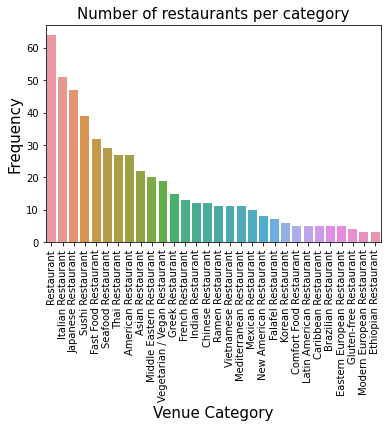

<Figure size 1296x504 with 0 Axes>

In [95]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=toronto_venues_top30)
s.set_xticklabels(s.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.title('Number of restaurants per category', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [96]:

toronto_venues_restaurant = toronto_venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
toronto_venues_restaurant

Neighborhood
Agincourt                                                                                                                                  5
Bedford Park, Lawrence Manor East                                                                                                          9
Berczy Park                                                                                                                               14
Brockton, Parkdale Village, Exhibition Place                                                                                              17
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport                                21
Caledonia-Fairbanks                                                                                                                        1
Central Bay Street                                                                                                                        11


In [98]:
toronto_venues_restaurant_df  = toronto_venues_restaurant.to_frame().reset_index()
toronto_venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
toronto_venues_restaurant_df.index = np.arange(1, len(toronto_venues_restaurant_df)+1)
list_rest_no =toronto_venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =toronto_venues_restaurant_df['Neighborhood'].to_list()

In [99]:
# one hot encoding
torontorestaurant_onehot = pd.get_dummies(toronto_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torontorestaurant_onehot['Neighborhood'] = toronto_venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [torontorestaurant_onehot.columns[-1]] + list(torontorestaurant_onehot.columns[:-1])
torontorestaurant_onehot = torontorestaurant_onehot[fixed_columns]

torontorestaurant_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hong Kong Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
torontorestaurant_grouped = torontorestaurant_onehot.groupby('Neighborhood').mean().reset_index()
torontorestaurant_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hong Kong Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000
1,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00,0.000000,0.111111,0.0,0.000000,0.0,0.111111,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.0,0.111111,0.000000,0.000000,0.000000,0.000000
2,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.071429,0.0,0.000000,0.0,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.214286,0.000000,0.0,0.071429,0.000000,0.000000,0.071429,0.000000
3,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.117647,0.00,0.000000,0.000000,0.0,0.058824,0.0,0.000000,0.117647,0.117647,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.235294,0.058824,0.000000,0.0,0.000000,0.000000,0.000000,0.058824,0.000000
4,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.142857,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.238095,0.047619,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.0,0.047619,0.047619,0.000000,0.047619,0.095238,0.047619,0.047619,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.181818,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.090909,0.181818,0.000000,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.090909
7,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [101]:
#Find top 10 most common venues per neighbourhoods

num_top_venues = 10

for hood in torontorestaurant_grouped['Neighborhood']:
    print("----"+hood+"----")
    tempr = torontorestaurant_grouped[torontorestaurant_grouped['Neighborhood'] == hood].T.reset_index()
    tempr.columns = ['venue','freq']
    tempr = tempr.iloc[1:]
    tempr['freq'] = tempr['freq'].astype(float)
    tempr = tempr.round({'freq': 2})
    print(tempr.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                        venue  freq
0          Chinese Restaurant   0.4
1       Vietnamese Restaurant   0.2
2        Hong Kong Restaurant   0.2
3            Sushi Restaurant   0.2
4         Peruvian Restaurant   0.0
5   Latin American Restaurant   0.0
6    Mediterranean Restaurant   0.0
7          Mexican Restaurant   0.0
8   Middle Eastern Restaurant   0.0
9  Modern European Restaurant   0.0


----Bedford Park, Lawrence Manor East----
                      venue  freq
0        Italian Restaurant  0.22
1         Indian Restaurant  0.11
2           Thai Restaurant  0.11
3          Sushi Restaurant  0.11
4   Comfort Food Restaurant  0.11
5                Restaurant  0.11
6          Greek Restaurant  0.11
7      Fast Food Restaurant  0.11
8   New American Restaurant  0.00
9  Mediterranean Restaurant  0.00


----Berczy Park----
                             venue  freq
0               Seafood Restaurant  0.21
1                       Restaurant  0.14
2    Vegetarian / Vegan

In [103]:
#Create data frame and sort values

def return_most_common_venue(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = torontorestaurant_grouped['Neighborhood']

for ind in np.arange(torontorestaurant_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torontorestaurant_grouped.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Vietnamese Restaurant,Sushi Restaurant,Hong Kong Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
1,"Bedford Park, Lawrence Manor East",Italian Restaurant,Indian Restaurant,Sushi Restaurant,Greek Restaurant,Fast Food Restaurant,Restaurant,Comfort Food Restaurant,Thai Restaurant,Cantonese Restaurant,Brazilian Restaurant
2,Berczy Park,Seafood Restaurant,Restaurant,Indian Restaurant,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,French Restaurant,Eastern European Restaurant,Molecular Gastronomy Restaurant,Greek Restaurant
3,"Brockton, Parkdale Village, Exhibition Place",Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,Ethiopian Restaurant,Hawaiian Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Korean Restaurant,Mexican Restaurant
4,"CN Tower, King and Spadina, Railway Lands, Har...",Italian Restaurant,French Restaurant,Restaurant,Ramen Restaurant,Latin American Restaurant,Japanese Restaurant,New American Restaurant,Peruvian Restaurant,Caribbean Restaurant,Mexican Restaurant
5,Caledonia-Fairbanks,Mexican Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
6,Central Bay Street,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Modern European Restaurant,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Ramen Restaurant,Mexican Restaurant,German Restaurant
7,Christie,Italian Restaurant,Eastern European Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant,Falafel Restaurant
8,Church and Wellesley,Japanese Restaurant,Sushi Restaurant,Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Indian Restaurant,Mexican Restaurant,Ethiopian Restaurant,Italian Restaurant,American Restaurant
9,"Clairville, Humberwood, Woodbine Downs, West H...",Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Fast Food Restaurant


In [108]:
neighborhood_venues_sorted.shape

(60, 11)